In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\accident_india.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   3000 non-null   object
 1   City Name                    3000 non-null   object
 2   Year                         3000 non-null   int64 
 3   Month                        3000 non-null   object
 4   Day of Week                  3000 non-null   object
 5   Time of Day                  3000 non-null   object
 6   Accident Severity            3000 non-null   object
 7   Number of Vehicles Involved  3000 non-null   int64 
 8   Vehicle Type Involved        3000 non-null   object
 9   Number of Casualties         3000 non-null   int64 
 10  Number of Fatalities         3000 non-null   int64 
 11  Weather Conditions           3000 non-null   object
 12  Road Type                    3000 non-null   object
 13  Road Condition               3000

In [4]:
df.isnull().sum()

State Name                       0
City Name                        0
Year                             0
Month                            0
Day of Week                      0
Time of Day                      0
Accident Severity                0
Number of Vehicles Involved      0
Vehicle Type Involved            0
Number of Casualties             0
Number of Fatalities             0
Weather Conditions               0
Road Type                        0
Road Condition                   0
Lighting Conditions              0
Traffic Control Presence       716
Speed Limit (km/h)               0
Driver Age                       0
Driver Gender                    0
Driver License Status          975
Alcohol Involvement              0
Accident Location Details        0
dtype: int64

In [5]:
df.columns = df.columns.str.replace(" ","_").str.lower()

In [6]:
df.columns

Index(['state_name', 'city_name', 'year', 'month', 'day_of_week',
       'time_of_day', 'accident_severity', 'number_of_vehicles_involved',
       'vehicle_type_involved', 'number_of_casualties', 'number_of_fatalities',
       'weather_conditions', 'road_type', 'road_condition',
       'lighting_conditions', 'traffic_control_presence', 'speed_limit_(km/h)',
       'driver_age', 'driver_gender', 'driver_license_status',
       'alcohol_involvement', 'accident_location_details'],
      dtype='object')

In [7]:
df['traffic_control_presence'].unique()

array(['Signs', 'Signals', 'Police Checkpost', nan], dtype=object)

In [8]:
df['driver_license_status'].unique()

array([nan, 'Valid', 'Expired'], dtype=object)

In [9]:
df = df.drop_duplicates().reset_index(drop=True)

In [10]:
df

,state_name,city_name,year,month,day_of_week,time_of_day,accident_severity,number_of_vehicles_involved,vehicle_type_involved,number_of_casualties,...,road_type,road_condition,lighting_conditions,traffic_control_presence,speed_limit_(km/h),driver_age,driver_gender,driver_license_status,alcohol_involvement,accident_location_details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Tamil Nadu,Chennai,2021,January,Sunday,1:15,Minor,5,Truck,4,...,National Highway,Wet,Dark,Signs,74,43,Male,Expired,Yes,Intersection
2996,Uttarakhand,Unknown,2018,July,Sunday,10:12,Fatal,3,Car,3,...,Urban Road,Under Construction,Daylight,NaN,86,23,Female,NaN,Yes,Intersection
2997,Meghalaya,Unknown,2021,January,Thursday,19:34,Minor,2,Two-Wheeler,8,...,National Highway,Dry,Dark,Signs,47,57,Female,Valid,Yes,Intersection
2998,Meghalaya,Unknown,2023,June,Sunday,20:54,Fatal,1,Cycle,9,...,Urban Road,Under Construction,Daylight,Signs,60,28,Female,Expired,Yes,Bridge


In [11]:
df.columns
df.isnull().sum()

state_name                       0
city_name                        0
year                             0
month                            0
day_of_week                      0
time_of_day                      0
accident_severity                0
number_of_vehicles_involved      0
vehicle_type_involved            0
number_of_casualties             0
number_of_fatalities             0
weather_conditions               0
road_type                        0
road_condition                   0
lighting_conditions              0
traffic_control_presence       716
speed_limit_(km/h)               0
driver_age                       0
driver_gender                    0
driver_license_status          975
alcohol_involvement              0
accident_location_details        0
dtype: int64

In [12]:
cat_cols = ['accident_severity','weather_conditions','road_type','road_condition',
            'lighting_conditions','traffic_control_presence','vehicle_type_involved',
            'driver_gender','driver_license_status','alcohol_involvement','time_of_day','day_of_week']
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip().replace({'nan':'Unknown', 'None':'Unknown', '': 'Unknown'})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   state_name                   3000 non-null   object
 1   city_name                    3000 non-null   object
 2   year                         3000 non-null   int64 
 3   month                        3000 non-null   object
 4   day_of_week                  3000 non-null   object
 5   time_of_day                  3000 non-null   object
 6   accident_severity            3000 non-null   object
 7   number_of_vehicles_involved  3000 non-null   int64 
 8   vehicle_type_involved        3000 non-null   object
 9   number_of_casualties         3000 non-null   int64 
 10  number_of_fatalities         3000 non-null   int64 
 11  weather_conditions           3000 non-null   object
 12  road_type                    3000 non-null   object
 13  road_condition               3000

In [14]:
df['time_of_day'] = pd.to_datetime(df['time_of_day'],format='%H:%M')
df['time_of_day'] = df['time_of_day'].dt.time

In [15]:
df

,state_name,city_name,year,month,day_of_week,time_of_day,accident_severity,number_of_vehicles_involved,vehicle_type_involved,number_of_casualties,...,road_type,road_condition,lighting_conditions,traffic_control_presence,speed_limit_(km/h),driver_age,driver_gender,driver_license_status,alcohol_involvement,accident_location_details
0,Jammu and Kashmir,Unknown,2021,May,Monday,01:46:00,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,Unknown,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30:00,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,Unknown,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,05:37:00,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,Unknown,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,00:31:00,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21:00,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,Unknown,No,Intersection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Tamil Nadu,Chennai,2021,January,Sunday,01:15:00,Minor,5,Truck,4,...,National Highway,Wet,Dark,Signs,74,43,Male,Expired,Yes,Intersection
2996,Uttarakhand,Unknown,2018,July,Sunday,10:12:00,Fatal,3,Car,3,...,Urban Road,Under Construction,Daylight,Unknown,86,23,Female,Unknown,Yes,Intersection
2997,Meghalaya,Unknown,2021,January,Thursday,19:34:00,Minor,2,Two-Wheeler,8,...,National Highway,Dry,Dark,Signs,47,57,Female,Valid,Yes,Intersection
2998,Meghalaya,Unknown,2023,June,Sunday,20:54:00,Fatal,1,Cycle,9,...,Urban Road,Under Construction,Daylight,Signs,60,28,Female,Expired,Yes,Bridge


In [16]:
df.columns

Index(['state_name', 'city_name', 'year', 'month', 'day_of_week',
       'time_of_day', 'accident_severity', 'number_of_vehicles_involved',
       'vehicle_type_involved', 'number_of_casualties', 'number_of_fatalities',
       'weather_conditions', 'road_type', 'road_condition',
       'lighting_conditions', 'traffic_control_presence', 'speed_limit_(km/h)',
       'driver_age', 'driver_gender', 'driver_license_status',
       'alcohol_involvement', 'accident_location_details'],
      dtype='object')

In [17]:
# install as needed:
# pip install pandas numpy matplotlib seaborn folium scikit-learn geopandas shap folium plugins openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score
import scipy.stats as stats

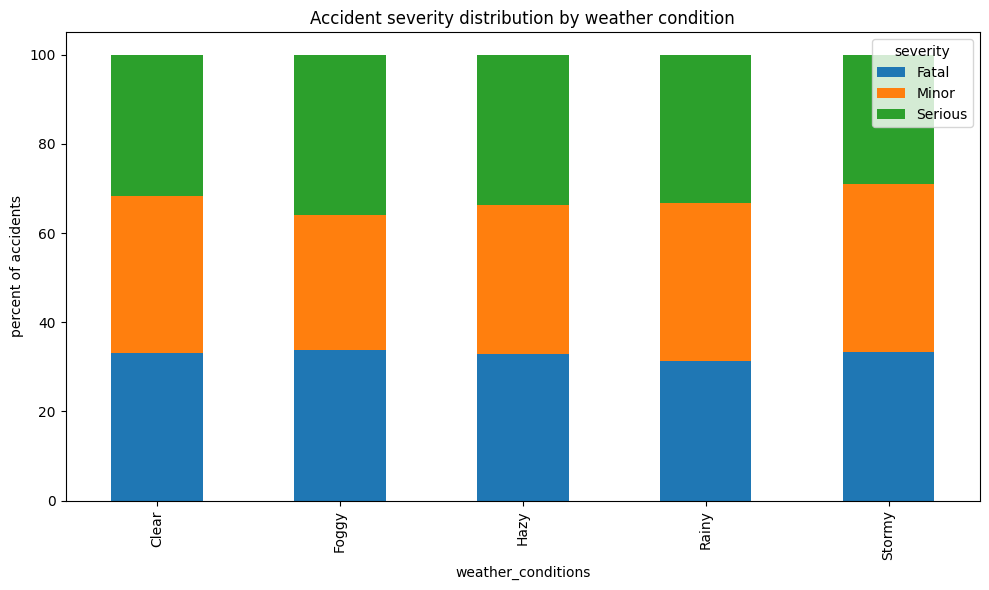

,total_accidents,mean_fatalities,fatality_rate
road_condition,,,
Under Construction,778,2.494859,0.831620
Dry,761,2.406045,0.804205
Wet,750,2.505333,0.829333
Damaged,711,2.412096,0.828411


In [18]:
# 4.1 counts by weather and severity
if 'weather_conditions' in df.columns and 'accident_severity' in df.columns:
    ct = pd.crosstab(df['weather_conditions'], df['accident_severity'], normalize='index')*100
    ct.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.ylabel("percent of accidents")
    plt.title("Accident severity distribution by weather condition")
    plt.legend(title='severity')
    plt.tight_layout()
    plt.show()

# 4.2 road_condition vs fatality rate
if 'road_condition' in df.columns:
    summary = df.groupby('road_condition').agg(
        total_accidents=('accident_severity','count'),
        mean_fatalities=('number_of_fatalities','mean'),
        fatality_rate=('number_of_fatalities', lambda x: (x>0).sum()/len(x))
    ).sort_values('total_accidents', ascending=False)
    display(summary.head(20))

# 4.3 time of day heatmap: weekday vs hour (count)
if 'day_of_week' in df.columns and 'hour' in df.columns:
    pivot = df.dropna(subset=['day_of_week','hour']).pivot_table(index='day_of_week', columns='hour', values='accident_severity', aggfunc='count').fillna(0)
    plt.figure(figsize=(12,5))
    sns.heatmap(pivot, cmap='Reds')
    plt.title("Accident counts: day_of_week vs hour")
    plt.show()


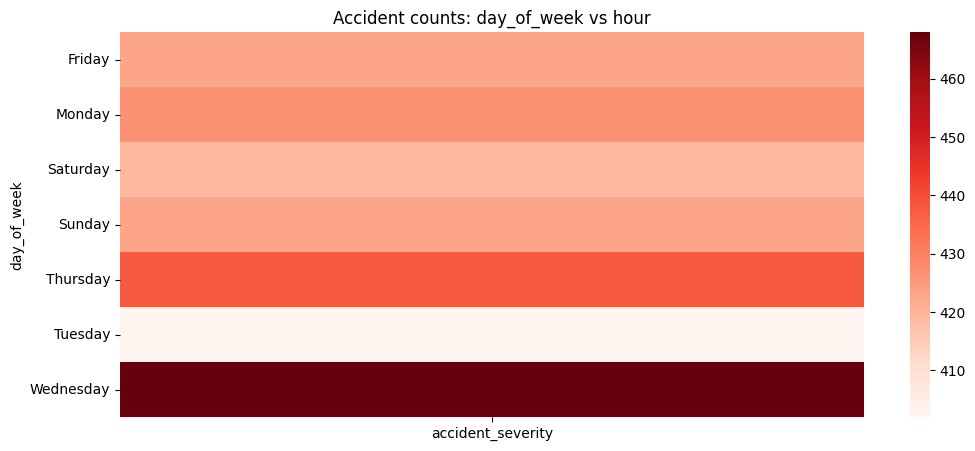

In [19]:
#if 'day_of_week' in df.columns and 'hour' in df.columns:
pivot = df.dropna(subset=['day_of_week']).pivot_table(index='day_of_week', values='accident_severity', aggfunc='count').fillna(0)
plt.figure(figsize=(12,5))
sns.heatmap(pivot, cmap='Reds')
plt.title("Accident counts: day_of_week vs hour")
plt.show()

In [20]:
r_c= df.groupby('road_condition')['number_of_casualties'].sum().sort_values(ascending=False)

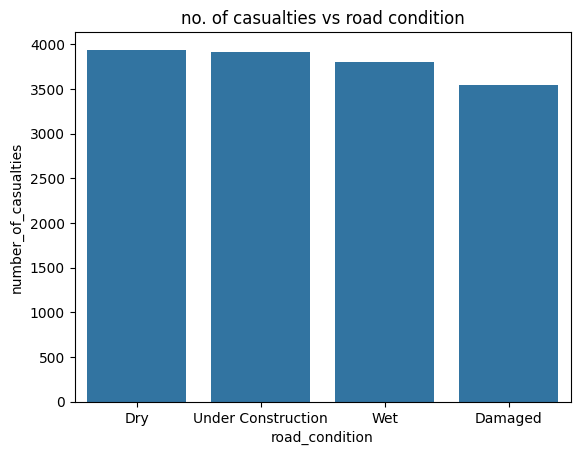

In [21]:
sns.barplot(data = r_c)
plt.title('no. of casualties vs road condition')
plt.show()

In [22]:
df.columns

Index(['state_name', 'city_name', 'year', 'month', 'day_of_week',
       'time_of_day', 'accident_severity', 'number_of_vehicles_involved',
       'vehicle_type_involved', 'number_of_casualties', 'number_of_fatalities',
       'weather_conditions', 'road_type', 'road_condition',
       'lighting_conditions', 'traffic_control_presence', 'speed_limit_(km/h)',
       'driver_age', 'driver_gender', 'driver_license_status',
       'alcohol_involvement', 'accident_location_details'],
      dtype='object')

In [23]:
r_t = df.road_type.value_counts()

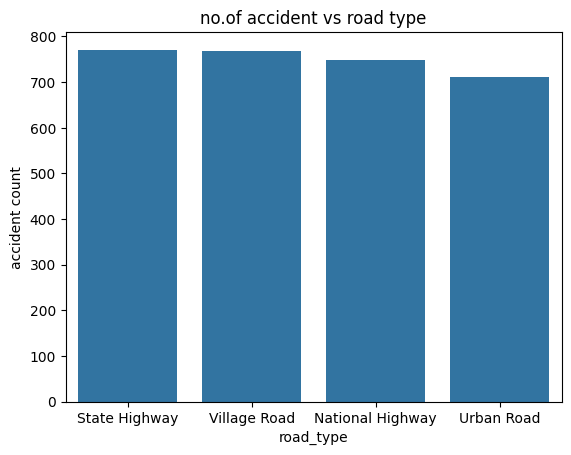

In [24]:
sns.barplot(data=r_t)
plt.title('no.of accident vs road type')
plt.ylabel('accident count')
plt.show()

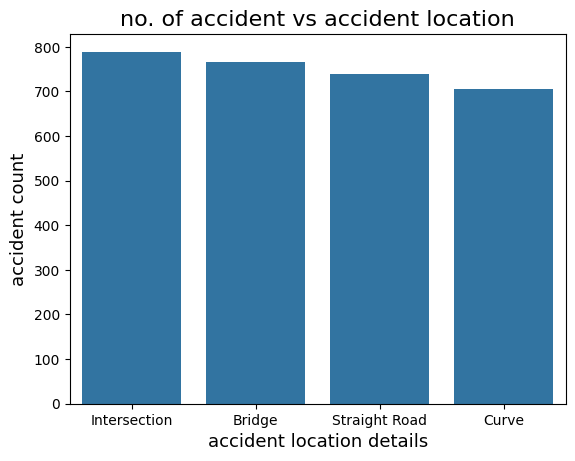

In [25]:
# where does the most accident occur by accident location...


a_l = df.accident_location_details.value_counts()

sns.barplot(data=a_l)
plt.title('no. of accident vs accident location',fontsize=16)
plt.ylabel('accident count',fontsize=13)
plt.xlabel('accident location details',fontsize=13)
plt.show()

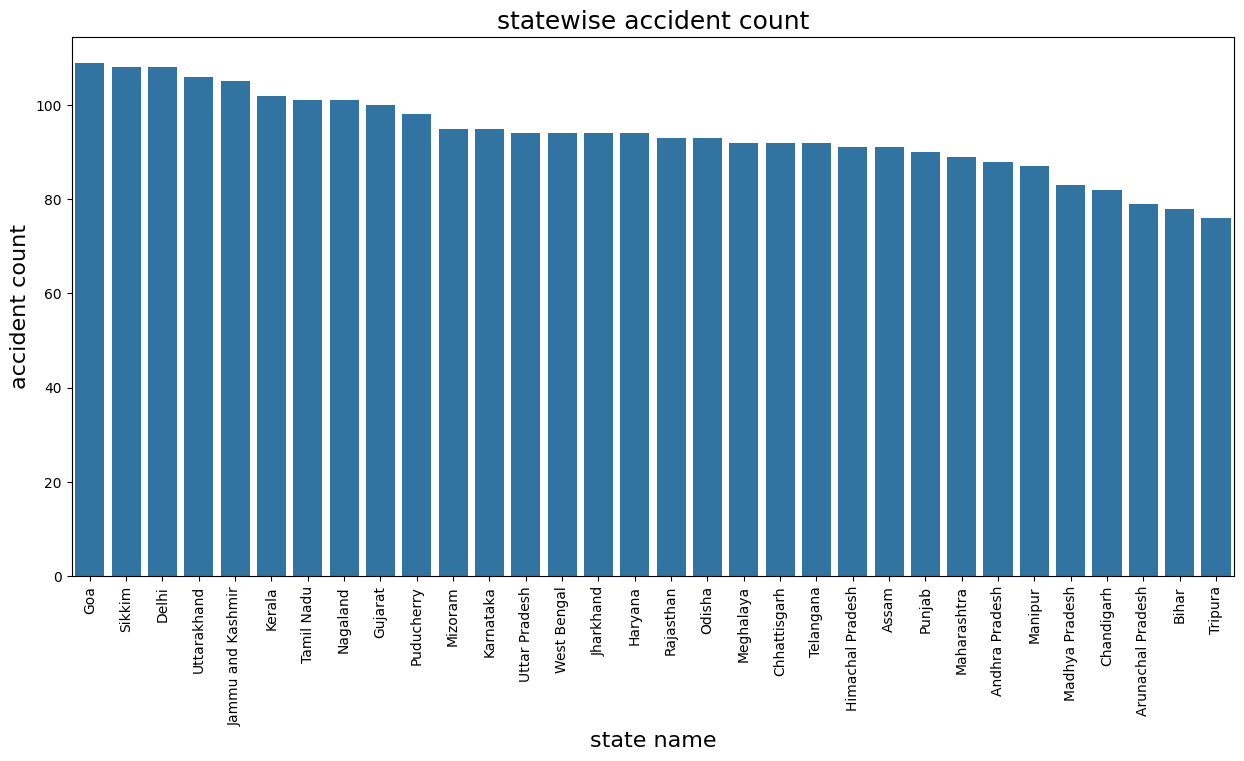

In [26]:
# statewise accident count....

s_t = df.state_name.value_counts()

plt.figure(figsize=(15,7))
sns.barplot(data=s_t)
plt.title("statewise accident count",fontsize=18)
plt.xlabel('state name', fontsize=16)
plt.ylabel('accident count', fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [27]:
df.columns

Index(['state_name', 'city_name', 'year', 'month', 'day_of_week',
       'time_of_day', 'accident_severity', 'number_of_vehicles_involved',
       'vehicle_type_involved', 'number_of_casualties', 'number_of_fatalities',
       'weather_conditions', 'road_type', 'road_condition',
       'lighting_conditions', 'traffic_control_presence', 'speed_limit_(km/h)',
       'driver_age', 'driver_gender', 'driver_license_status',
       'alcohol_involvement', 'accident_location_details'],
      dtype='object')

In [28]:
t_d = df['time_of_day'].value_counts()
t_d

time_of_day
03:40:00    7
18:24:00    7
14:16:00    7
08:34:00    7
06:32:00    6
           ..
11:03:00    1
05:50:00    1
21:49:00    1
17:56:00    1
13:57:00    1
Name: count, Length: 1263, dtype: int64

In [29]:
df['time_of_day'] = df['time_of_day'].astype(str).str.strip()

In [30]:
df['hour'] = pd.to_datetime(df['time_of_day'], errors='coerce').dt.hour

C:\Users\DELL\AppData\Local\Temp\ipykernel_2300\337198632.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time_of_day'], errors='coerce').dt.hour


In [31]:
df

,state_name,city_name,year,month,day_of_week,time_of_day,accident_severity,number_of_vehicles_involved,vehicle_type_involved,number_of_casualties,...,road_condition,lighting_conditions,traffic_control_presence,speed_limit_(km/h),driver_age,driver_gender,driver_license_status,alcohol_involvement,accident_location_details,hour
0,Jammu and Kashmir,Unknown,2021,May,Monday,01:46:00,Serious,5,Cycle,0,...,Wet,Dark,Signs,61,66,Male,Unknown,Yes,Curve,1
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30:00,Minor,5,Truck,5,...,Dry,Dusk,Signs,92,60,Male,Unknown,Yes,Straight Road,21
2,Chhattisgarh,Unknown,2023,May,Wednesday,05:37:00,Minor,5,Pedestrian,6,...,Under Construction,Dawn,Signs,120,26,Female,Unknown,No,Bridge,5
3,Uttar Pradesh,Lucknow,2020,June,Saturday,00:31:00,Minor,3,Bus,10,...,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road,0
4,Sikkim,Unknown,2021,August,Thursday,11:21:00,Minor,5,Cycle,7,...,Wet,Dusk,Signs,115,30,Male,Unknown,No,Intersection,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Tamil Nadu,Chennai,2021,January,Sunday,01:15:00,Minor,5,Truck,4,...,Wet,Dark,Signs,74,43,Male,Expired,Yes,Intersection,1
2996,Uttarakhand,Unknown,2018,July,Sunday,10:12:00,Fatal,3,Car,3,...,Under Construction,Daylight,Unknown,86,23,Female,Unknown,Yes,Intersection,10
2997,Meghalaya,Unknown,2021,January,Thursday,19:34:00,Minor,2,Two-Wheeler,8,...,Dry,Dark,Signs,47,57,Female,Valid,Yes,Intersection,19
2998,Meghalaya,Unknown,2023,June,Sunday,20:54:00,Fatal,1,Cycle,9,...,Under Construction,Daylight,Signs,60,28,Female,Expired,Yes,Bridge,20


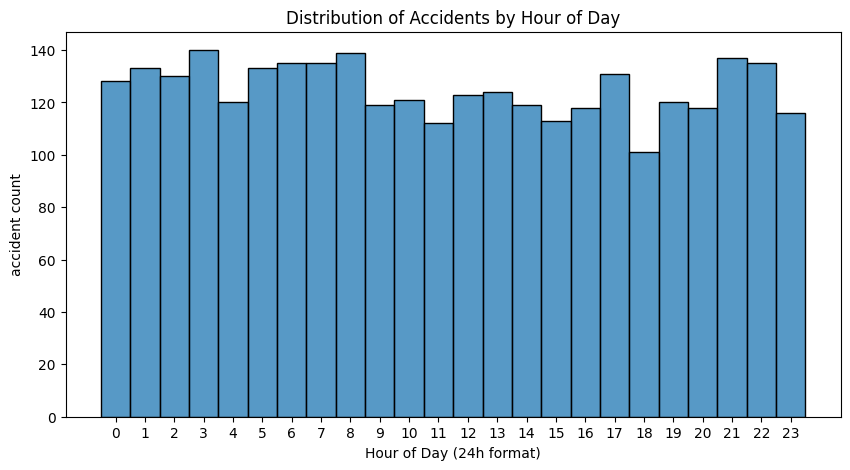

In [32]:
# at what time does the most of accident occur...


plt.figure(figsize=(10,5))
sns.histplot(data=df, x='hour', bins=24, discrete=True)
plt.xticks(range(0,24))
plt.xlabel("Hour of Day (24h format)")
plt.ylabel("accident count")
plt.title("Distribution of Accidents by Hour of Day")
plt.show()

In [33]:
df.columns

Index(['state_name', 'city_name', 'year', 'month', 'day_of_week',
       'time_of_day', 'accident_severity', 'number_of_vehicles_involved',
       'vehicle_type_involved', 'number_of_casualties', 'number_of_fatalities',
       'weather_conditions', 'road_type', 'road_condition',
       'lighting_conditions', 'traffic_control_presence', 'speed_limit_(km/h)',
       'driver_age', 'driver_gender', 'driver_license_status',
       'alcohol_involvement', 'accident_location_details', 'hour'],
      dtype='object')

In [34]:
most_accident_speed = df['speed_limit_(km/h)'].value_counts().idxmax()
most_accident_count = df['speed_limit_(km/h)'].value_counts().max()

print(f"⚠️ Most accidents occurred at speed limit {most_accident_speed} with {most_accident_count} accidents.")

⚠️ Most accidents occurred at speed limit 35 with 52 accidents.


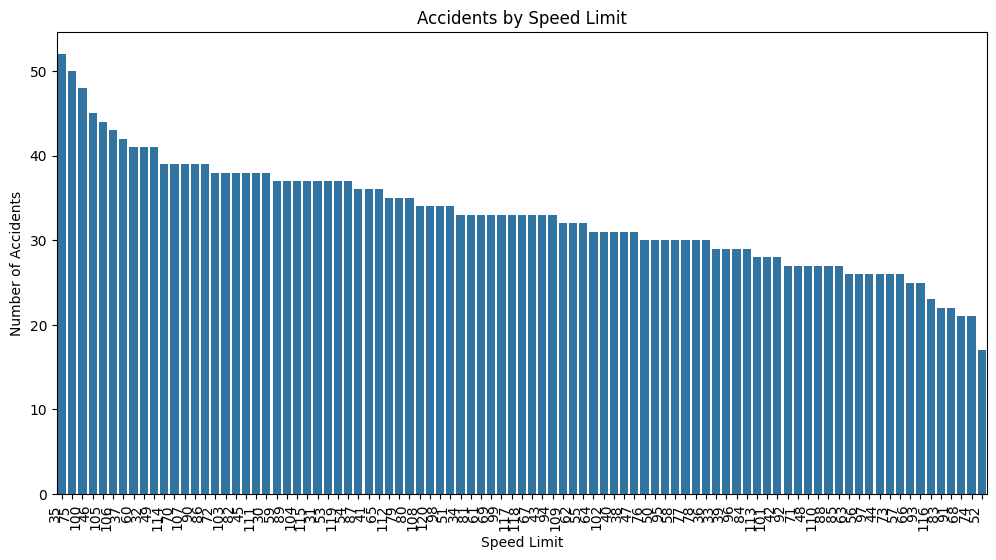

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='speed_limit_(km/h)', order=df['speed_limit_(km/h)'].value_counts().index)

plt.xlabel("Speed Limit")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Speed Limit")

# Show every 2nd (or 5th) tick
plt.xticks(ticks=range(0, len(df['speed_limit_(km/h)'].unique()), 1), rotation=90, ha="right")
plt.show()

In [36]:
df.columns

Index(['state_name', 'city_name', 'year', 'month', 'day_of_week',
       'time_of_day', 'accident_severity', 'number_of_vehicles_involved',
       'vehicle_type_involved', 'number_of_casualties', 'number_of_fatalities',
       'weather_conditions', 'road_type', 'road_condition',
       'lighting_conditions', 'traffic_control_presence', 'speed_limit_(km/h)',
       'driver_age', 'driver_gender', 'driver_license_status',
       'alcohol_involvement', 'accident_location_details', 'hour'],
      dtype='object')

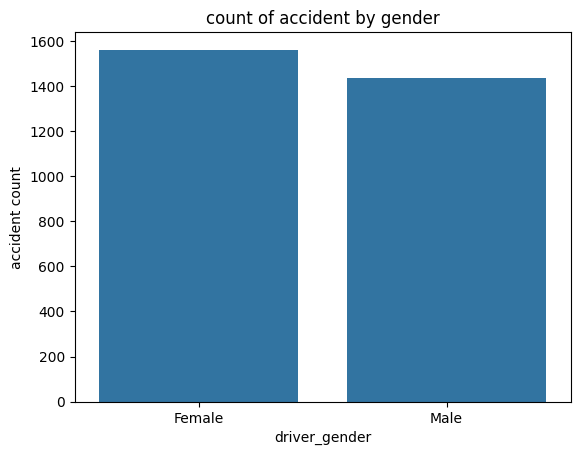

In [37]:
gen = df['driver_gender'].value_counts()

sns.barplot(data=gen)
plt.title("count of accident by gender")
plt.ylabel("accident count")
plt.show()

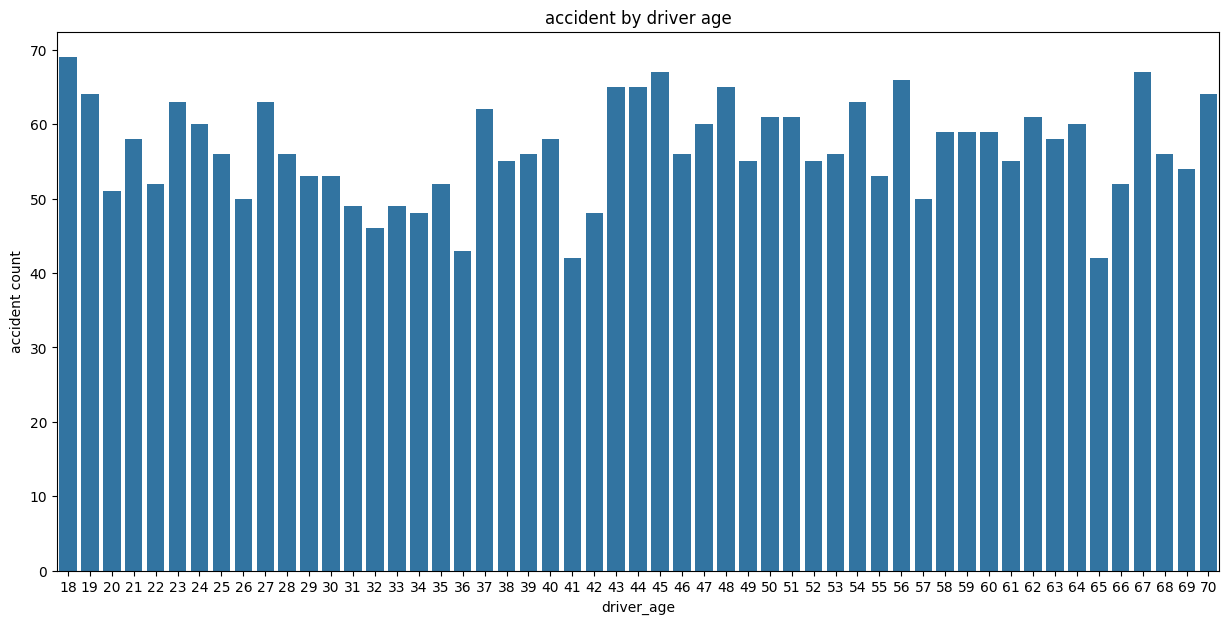

In [38]:
age = df['driver_age'].value_counts()

plt.figure(figsize=(15,7))
sns.barplot(data=age)
plt.title("accident by driver age")
plt.ylabel('accident count')
plt.show()

In [39]:
df.columns

Index(['state_name', 'city_name', 'year', 'month', 'day_of_week',
       'time_of_day', 'accident_severity', 'number_of_vehicles_involved',
       'vehicle_type_involved', 'number_of_casualties', 'number_of_fatalities',
       'weather_conditions', 'road_type', 'road_condition',
       'lighting_conditions', 'traffic_control_presence', 'speed_limit_(km/h)',
       'driver_age', 'driver_gender', 'driver_license_status',
       'alcohol_involvement', 'accident_location_details', 'hour'],
      dtype='object')

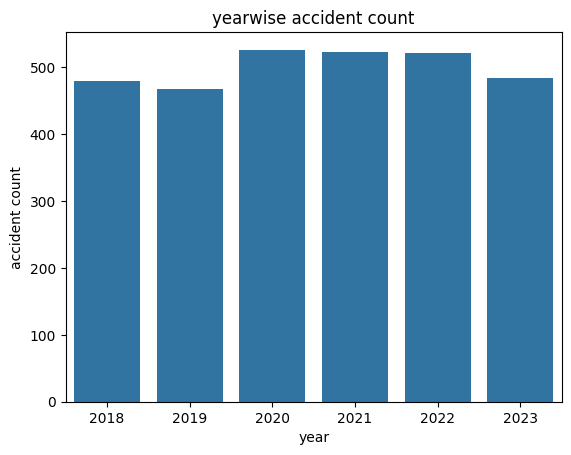

In [40]:
y = df['year'].value_counts().sort_index()

sns.barplot(data=y)
plt.title('yearwise accident count')
plt.ylabel('accident count')
plt.show()

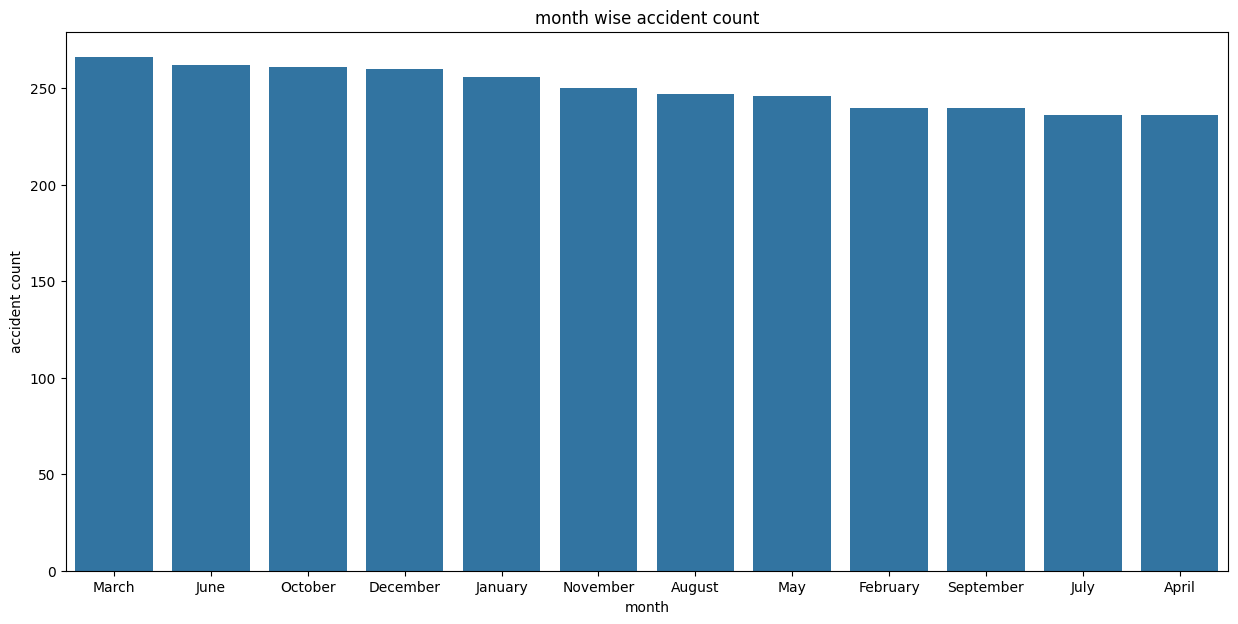

In [41]:
m = df['month'].value_counts()

plt.figure(figsize=(15,7))
sns.barplot(data=m)
plt.title('month wise accident count')
plt.ylabel('accident count')
plt.show()

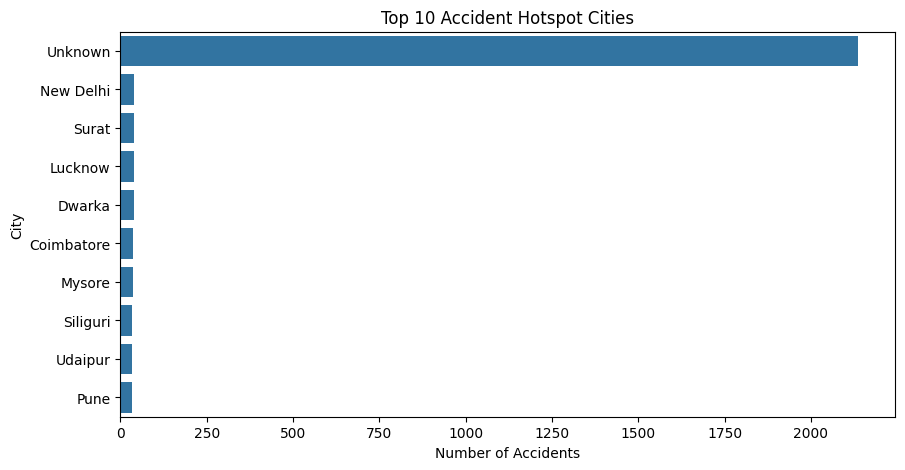

In [42]:
# Count by city
city_hotspots = df['city_name'].value_counts().head(10)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x=city_hotspots.values, y=city_hotspots.index)
plt.xlabel("Number of Accidents")
plt.ylabel("City")
plt.title("Top 10 Accident Hotspot Cities")
plt.show()

In [ ]:
# alchohol involvement vs accident count...

sns.countplot(data=df, x='alcohol_involvement')
plt.title("Accidents: Alcohol Involvement")
plt.show()

In [ ]:
# Accident Analysis

This project analyzes traffic accident data to identify patterns related to road conditions, weather, time of day, and contributing factors.

## Dataset
- Source: [Add source or link]
- Columns: state_name, city_name, year, month, accident_severity, vehicle_type_involved, weather_conditions, road_condition, lighting_conditions, speed_limit_(km/h), driver_age, driver_gender, alcohol_involvement, etc.

## Tools
- Python, pandas, matplotlib, seaborn, folium

## How to Run
1. Install dependencies: `pip install -r requirements.txt`
2. Open `notebooks/accident_analysis.ipynb`
3. Run the notebook to reproduce the analysis
